In [1]:
#!pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import geopandas as gpd
from pathlib import Path
import os
import requests, zipfile, io
import plotly

import warnings
warnings.filterwarnings('ignore')

Acknowledgement: Much of this code was helped made from my homework responses to AQI project from Data200 fall 2021. I give credit to the course staff for guiding me in many of these EDA ideas through the problem statements. Any code not provided in class was written by me

In [289]:
#works!!
epa_data = {}
for root,dirs, files in os.walk(".",topdown=True):
    for name in files:
        if name[-4:] == ".csv":
            path = os.path.join(root, name)
            data = pd.read_csv(path)
            print(path)
            if "./AQI_Data/" in root:
                pattern = r"./AQI_Data/(\w+)/\w+.csv"
                ls_match = re.findall(pattern,str(path))
                if "/.ipynb" not in root:
                    print(ls_match)
                    name = ls_match[0]
                    epa_data[name] = data
            else:
                epa_data[name[:-4]] = data

./us_greenhouse_gas_emission_direct_emitter_gas_type.csv
./daily_us_weather_2020.csv
./2020.csv
./us_air_quality_measures.csv
./daily_global_weather_2020.csv
./us_greenhouse_gas_emissions_direct_emitter_facilities.csv
./AQI_Data/epa_filenames.csv
./AQI_Data/Traffic_Volumes_AADT.csv
./AQI_Data/daily_co/daily_42101_2020.csv
['daily_co']
./AQI_Data/daily_no2/daily_42602_2020.csv
['daily_no2']
./AQI_Data/annual_county_aqi/annual_aqi_by_county_2020.csv
['annual_county_aqi']
./AQI_Data/aqs_sites/aqs_sites.csv
['aqs_sites']
./AQI_Data/daily_so2/daily_42401_2020.csv
['daily_so2']
./AQI_Data/daily_wind/daily_TEMP_2020.csv
['daily_wind']
./AQI_Data/daily_ozone/daily_44201_2020.csv
['daily_ozone']
./AQI_Data/daily_temp/daily_WIND_2020.csv
['daily_temp']
./AQI_Data/daily_county_aqi/daily_aqi_by_county_2020.csv
['daily_county_aqi']
./AQI_Data/previous_data/epa_data_CA_merged.csv
['previous_data']


In [290]:
epa_data.keys()

dict_keys(['us_greenhouse_gas_emission_direct_emitter_gas_type', 'daily_us_weather_2020', '2020', 'us_air_quality_measures', 'daily_global_weather_2020', 'us_greenhouse_gas_emissions_direct_emitter_facilities', 'epa_filenames', 'Traffic_Volumes_AADT', 'daily_co', 'daily_no2', 'annual_county_aqi', 'aqs_sites', 'daily_so2', 'daily_wind', 'daily_ozone', 'daily_temp', 'daily_county_aqi', 'previous_data'])

In [291]:
daily_county = epa_data.get('daily_county_aqi')
daily_county['Month'] = pd.to_datetime(daily_county['Date']).dt.month
daily_county['Day'] = pd.to_datetime(daily_county['Date']).dt.day


daily_county.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Month,Day
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1,1,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1,1,4
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1,1,7
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1,1,10
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1,1,13


https://www.epa.gov/outdoor-air-quality-data/about-air-data-reports
Site ID:
   FIPS state code (2) - FIPS county code (3) - AQS site code (4)
e.g 10-003-2004

In [292]:
epa_data['aqs_sites'].head()#take the lat and longitude info from aqs sites and put in daily_county_aqi

,State Code,County Code,Site Number,Latitude,Longitude,Datum,Elevation,Land Use,Location Setting,Site Established Date,...,Owning Agency,Local Site Name,Address,Zip Code,State Name,County Name,City Name,CBSA Name,Tribe Name,Extraction Date
0,01,1,1,32.437458,-86.472891,WGS84,64.0,RESIDENTIAL,SUBURBAN,1974-05-01,...,Al Dept Of Env Mgt,NaN,"KING ARTHUR TRAILER COURT, PRATTVILLE,AL",36067.0,Alabama,Autauga,Prattville,"Montgomery, AL",NaN,2021-05-18
1,01,1,2,32.428470,-86.443585,WGS84,0.0,AGRICULTURAL,RURAL,1980-01-01,...,Al Dept Of Env Mgt,NaN,COUNTY RD 4 PRATTVILLE EXPERIMENT ST,NaN,Alabama,Autauga,Prattville,"Montgomery, AL",NaN,2021-05-18
2,01,1,3,32.332659,-86.791521,WGS84,41.0,FOREST,RURAL,1989-08-31,...,Al Dept Of Env Mgt,NaN,"1170 COUNTY RD.15 SO., SELMA, AL. 36701",36003.0,Alabama,Autauga,Not in a City,"Montgomery, AL",NaN,2021-05-18
3,01,3,1,0.000000,0.000000,NAD27,0.0,UNKNOWN,RURAL,1959-01-01,...,US EPA National Exposure Research Lab,NaN,CHANDLER RESIDENCE FT MORGAN STATE PARK,NaN,Alabama,Baldwin,Not in a city,"Daphne-Fairhope-Foley, AL",NaN,2021-05-18
4,01,3,2,30.552367,-87.706911,WGS84,0.0,COMMERCIAL,RURAL,1974-01-01,...,Al Dept Of Env Mgt,NaN,COR PENNSYLVANIA & CHICAGO (ROBERTSDALE),36567.0,Alabama,Baldwin,Robertsdale,"Daphne-Fairhope-Foley, AL",NaN,2021-05-18


In [293]:
list(epa_data)

['us_greenhouse_gas_emission_direct_emitter_gas_type',
 'daily_us_weather_2020',
 '2020',
 'us_air_quality_measures',
 'daily_global_weather_2020',
 'us_greenhouse_gas_emissions_direct_emitter_facilities',
 'epa_filenames',
 'Traffic_Volumes_AADT',
 'daily_co',
 'daily_no2',
 'annual_county_aqi',
 'aqs_sites',
 'daily_so2',
 'daily_wind',
 'daily_ozone',
 'daily_temp',
 'daily_county_aqi',
 'previous_data']

In [294]:
epa_data_CA = {}
keep_out = ['annual_county_aqi','aqs_sites','us_air_quality_measures','us_greenhouse_gas_emission_direct_emitter_gas_type',\
            'us_greenhouse_gas_emissions_direct_emitter_facilities','daily_global_weather_2020','2021','epa_filenames','Traffic_Volumes_AADT']
for table in list(epa_data):
    if table in keep_out:
        continue
    elif 'State Name' not in epa_data[table].keys():
        print(table)
        print(epa_data[table].head())
    else:
        epa_data_CA[table] = epa_data[table][epa_data[table]["State Name"] == 'California']

epa_data_CA.get('daily_county_aqi').head()

daily_us_weather_2020
   Unnamed: 0.1  index  Unnamed: 0      Station        Date  TAVG  Latitude  \
0             0    222         222  CA001017099  2020-01-01  73.0   48.7833   
1             1    223         223  CA001017101  2020-01-01  98.0   48.7833   
2             2    226         226  CA001018611  2020-01-01  88.0   48.0333   
3             3    266         266  CA001054503  2020-01-01  39.0   54.2500   
4             4    267         267  CA001054500  2020-01-01  58.0   54.2500   

   Longitude  Elevation  PRCP Country               City  
0  -123.1333      178.0   0.0      US      Point Roberts  
1  -123.0500       24.0   0.0      US      Point Roberts  
2  -123.3333       70.0   2.0      US  Port Angeles East  
3  -133.0667       44.0  37.0      US              Craig  
4  -133.0500       43.0  22.0      US              Craig  
2020
   AE000041196  20200101  TMIN  168 Unnamed: 4 Unnamed: 5  S  Unnamed: 7
0  AE000041196  20200101  PRCP    0          D        NaN  S         Na

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Month,Day
14003,California,Alameda,6,1,2020-01-01,53,Moderate,PM2.5,06-001-0009,7,1,1
14004,California,Alameda,6,1,2020-01-02,43,Good,PM2.5,06-001-0013,7,1,2
14005,California,Alameda,6,1,2020-01-03,74,Moderate,PM2.5,06-001-0013,7,1,3
14006,California,Alameda,6,1,2020-01-04,45,Good,PM2.5,06-001-0007,7,1,4
14007,California,Alameda,6,1,2020-01-05,33,Good,PM2.5,06-001-0007,7,1,5


In [295]:
# epa_data['annual_county_aqi'].keys()
epa_data['aqs_sites'].keys()

Index(['State Code', 'County Code', 'Site Number', 'Latitude', 'Longitude',
       'Datum', 'Elevation', 'Land Use', 'Location Setting',
       'Site Established Date', 'Site Closed Date', 'Met Site State Code',
       'Met Site County Code', 'Met Site Site Number', 'Met Site Type',
       'Met Site Distance', 'Met Site Direction', 'GMT Offset',
       'Owning Agency', 'Local Site Name', 'Address', 'Zip Code', 'State Name',
       'County Name', 'City Name', 'CBSA Name', 'Tribe Name',
       'Extraction Date'],
      dtype='object')

In [387]:
cols = ['State Name', 'county Name', 'Month', 'Day', 'AQI', 'Category', 'Defining Site', 'Latitude', 'Longitude']
epa_data['aqs_sites']['a'] = epa_data['aqs_sites']['State Code'].astype(str).str.zfill(2)
epa_data['aqs_sites']['b'] = epa_data['aqs_sites']['County Code'].astype(str).str.zfill(3)
epa_data['aqs_sites']['c'] = epa_data['aqs_sites']['Site Number'].astype(str).str.zfill(4)
epa_data['aqs_sites']['Defining Site'] = epa_data['aqs_sites']['a'] + '-' + epa_data['aqs_sites']['b'] + '-' + epa_data['aqs_sites']['c']
epa_data_CA_merged = epa_data_CA['daily_county_aqi'].merge(epa_data['aqs_sites'], how='left', left_on='Defining Site', right_on='Defining Site', suffixes=('', '_y'))[cols]

epa_data_CA_merged = epa_data_CA_merged.rename(columns={"county Name": "County Name"})

In [388]:
epa_data_CA_merged 

,State Name,County Name,Month,Day,AQI,Category,Defining Site,Latitude,Longitude
0,California,Alameda,1,1,53,Moderate,06-001-0009,37.743065,-122.169935
1,California,Alameda,1,2,43,Good,06-001-0013,37.864767,-122.302741
2,California,Alameda,1,3,74,Moderate,06-001-0013,37.864767,-122.302741
3,California,Alameda,1,4,45,Good,06-001-0007,37.687526,-121.784217
4,California,Alameda,1,5,33,Good,06-001-0007,37.687526,-121.784217
...,...,...,...,...,...,...,...,...,...
19220,California,Yolo,12,27,20,Good,06-113-0004,38.534450,-121.773400
19221,California,Yolo,12,28,33,Good,06-113-0004,38.534450,-121.773400
19222,California,Yolo,12,29,28,Good,06-113-0004,38.534450,-121.773400
19223,California,Yolo,12,30,39,Good,06-113-0004,38.534450,-121.773400


In [47]:
epa_data_CA['daily_county_aqi']

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Month,Day
14003,California,Alameda,6,1,2020-01-01,53,Moderate,PM2.5,06-001-0009,7,1,1
14004,California,Alameda,6,1,2020-01-02,43,Good,PM2.5,06-001-0013,7,1,2
14005,California,Alameda,6,1,2020-01-03,74,Moderate,PM2.5,06-001-0013,7,1,3
14006,California,Alameda,6,1,2020-01-04,45,Good,PM2.5,06-001-0007,7,1,4
14007,California,Alameda,6,1,2020-01-05,33,Good,PM2.5,06-001-0007,7,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
33223,California,Yolo,6,113,2020-12-27,20,Good,Ozone,06-113-0004,2,12,27
33224,California,Yolo,6,113,2020-12-28,33,Good,Ozone,06-113-0004,2,12,28
33225,California,Yolo,6,113,2020-12-29,28,Good,Ozone,06-113-0004,3,12,29
33226,California,Yolo,6,113,2020-12-30,39,Good,PM2.5,06-113-0004,2,12,30


## Worst AQI by state

In [11]:
worst_median_aqis = epa_data['annual_county_aqi'].groupby('State').mean('Median AQI').sort_values('Median AQI', ascending=False)[['Median AQI']].rename(columns={'Median AQI':'Average Median AQI'}).drop(['Country Of Mexico','District Of Columbia'])['Average Median AQI'].head(10)
#worst_max_aqis =  epa_data['annual_county_aqi'].groupby('State').mean('Max AQI').sort_values('Max AQI', ascending=False)[['Max AQI']].rename(columns={'Max AQI':'Average Max AQI'}).drop(['Country Of Mexico','District Of Columbia']).head(10)
worst_max_aqis = epa_data['annual_county_aqi'].groupby('State').mean('Max AQI').sort_values('Max AQI', ascending=False)[['Max AQI']].rename(columns={'Max AQI':'Average Max AQI'}).drop(['Country Of Mexico','District Of Columbia','Puerto Rico'])['Average Max AQI'].head(10)
print("Worst Median AQI : \n{}\n".format(worst_median_aqis))
print("Worst Max AQI : \n{}".format(worst_max_aqis))
np.round(list(worst_max_aqis), 2)
np.round(list(worst_median_aqis), 2)

Worst Median AQI : 
State
California       48.018868
Arizona          47.307692
Utah             41.066667
Connecticut      39.125000
Delaware         38.000000
Mississippi      37.200000
New Jersey       36.937500
Massachusetts    36.538462
Nevada           36.222222
Pennsylvania     35.756098
Name: Average Median AQI, dtype: float64

Worst Max AQI : 
State
Oregon          430.347826
Washington      334.419355
California      286.981132
Arizona         238.230769
Idaho           197.857143
Wyoming         196.666667
Nevada          196.666667
Montana         137.421053
Rhode Island    133.000000
Connecticut     124.750000
Name: Average Max AQI, dtype: float64


array([48.02, 47.31, 41.07, 39.12, 38.  , 37.2 , 36.94, 36.54, 36.22,
       35.76])

California, Arizona, Connecticut, and Nevada are in both top 10 lists. This signifies that the air quality in those states is worst overall. They are on both lists likely because of persistent wildfires and industrial emissions.

## Missing AQI Data

series that contains the state as the index and the average number of days with AQI entries across all counties in that state as the value

In [12]:
epa_data['annual_county_aqi'].keys() # Days with AQI

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [13]:
days_with_AQI = epa_data['annual_county_aqi'].groupby('State').mean('Days with AQI')['Days with AQI'].sort_values(ascending=True).drop(['Country Of Mexico','District Of Columbia','Puerto Rico','Virgin Islands'])
days_with_AQI.head()

State
Alaska        235.222222
Arkansas      251.545455
New Mexico    264.062500
Virginia      265.303030
Colorado      278.892857
Name: Days with AQI, dtype: float64

In [14]:
ca_annual_data = epa_data.get('annual_county_aqi')[epa_data.get('annual_county_aqi')['State'] == 'California']
ca_aqi_days = ca_annual_data['Days with AQI'].sort_values()
ca_aqi_days.head(20)

54    274
96    331
63    351
98    353
49    359
76    360
51    364
57    364
72    365
79    366
81    366
82    366
83    366
84    366
85    366
80    366
86    366
48    366
88    366
78    366
Name: Days with AQI, dtype: int64

In [15]:
county_to_missing_dates = {}

interested = ca_aqi_days[ca_aqi_days != 366]

for idx in interested.index:
    county = ca_annual_data.loc[idx]['County']
    evaluate = epa_data_CA['daily_county_aqi'][epa_data_CA['daily_county_aqi']['county Name'] == county]
    evaluate.set_index('Date',inplace=True)
    evaluate.index = pd.to_datetime(evaluate.index)
    dates = pd.date_range(start = '2020-01-01',end='2020-12-31').difference(evaluate.index).strftime('%Y-%m-%d')
    county_to_missing_dates[county] = dates

county_to_missing_dates

{'Del Norte': Index(['2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-20',
        '2020-01-21', '2020-01-23', '2020-03-14', '2020-03-15', '2020-04-22',
        '2020-04-23', '2020-04-25', '2020-04-26', '2020-04-28', '2020-04-29',
        '2020-05-01', '2020-05-02', '2020-05-04', '2020-05-05', '2020-05-07',
        '2020-05-08', '2020-05-10', '2020-05-11', '2020-05-13', '2020-05-14',
        '2020-05-16', '2020-05-17', '2020-05-19', '2020-05-20', '2020-05-22',
        '2020-05-23', '2020-05-25', '2020-05-26', '2020-05-28', '2020-05-29',
        '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
        '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
        '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
        '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
        '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
        '2020-06-25', '2020-06-26', '2020-06-27', '

Major missing dates in common were: February 29, 2020 (Count = 3), as well as July 1, 2020 through July 14, 2020.  Del Norte and Trinity counties had the most missing dates, perhaps because the wildfires occuring in those counties had some AQI values omitted.

## AQI over time

In [16]:
aqi_per_month = epa_data['daily_county_aqi'].groupby("Month").mean()["AQI"]
aqi_per_month_CA = epa_data_CA['daily_county_aqi'].groupby("Month").mean()["AQI"]
print("AQI per Month: \n{}\n".format(aqi_per_month))
print("AQI per Month California : \n{}".format(aqi_per_month_CA))

AQI per Month: 
Month
1     31.032050
2     32.258621
3     34.509181
4     37.287264
5     36.273464
6     40.533681
7     40.070404
8     41.252281
9     43.290611
10    35.285558
11    34.184020
12    34.990632
Name: AQI, dtype: float64

AQI per Month California : 
Month
1      46.346888
2      47.110236
3      40.114094
4      41.443462
5      49.538319
6      47.996146
7      56.069375
8      79.960220
9     107.020228
10     75.491763
11     52.070573
12     53.645516
Name: AQI, dtype: float64


In [17]:
aqi_per_month = aqi_per_month.rename('AQI_all')
aqi_per_month_CA = aqi_per_month_CA.rename('AQI_CA')

In [18]:
aqi_per_month_df = pd.concat([aqi_per_month,aqi_per_month_CA], axis=1)
aqi_per_month_df

,AQI_all,AQI_CA
Month,,
1,31.032050,46.346888
2,32.258621,47.110236
3,34.509181,40.114094
4,37.287264,41.443462
5,36.273464,49.538319
6,40.533681,47.996146
7,40.070404,56.069375
8,41.252281,79.960220
9,43.290611,107.020228


<AxesSubplot:xlabel='Month', ylabel='AQI_all'>

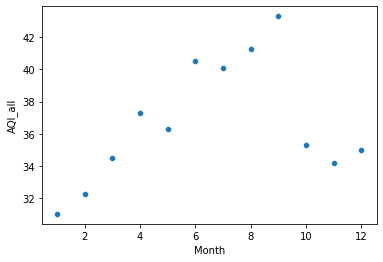

In [19]:
sns.scatterplot(x='Month',y='AQI_all',data=aqi_per_month_df)

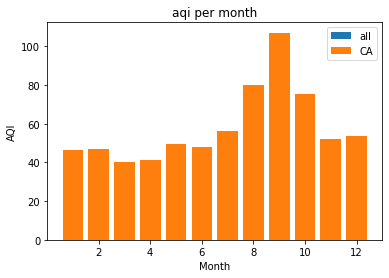

In [20]:
x = list(range(1,13))
y = aqi_per_month
plt.bar(x,y,label='all')
plt.bar(x,aqi_per_month_CA,label='CA')
plt.xlabel("Month")
plt.ylabel("AQI")
plt.title("aqi per month")
plt.legend()
plt.show()

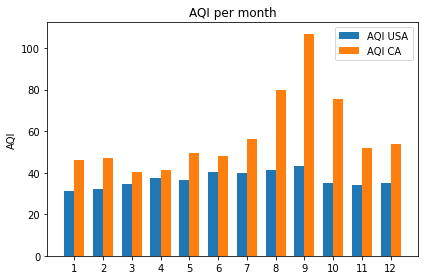

In [21]:
labels = ['1', '2', '3', '4', '5','6','7','8','9','10','11','12']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, aqi_per_month, width, label='AQI USA')
rects2 = ax.bar(x + width/2, aqi_per_month_CA, width, label='AQI CA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AQI')
ax.set_title('AQI per month')
ax.set_xticks(x, labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

We can see that the average AQI per month in the state of california is on average higher than the average for all US states. This is probably because CA has more wildfires on average compared to the rest of the USA. 

In [22]:
aqi_per_month_df1 = pd.DataFrame([aqi_per_month,aqi_per_month_CA])
aqi_per_month_df1 = aqi_per_month_df1.reset_index()

In [23]:
aqi_per_month_df1 

Month,index,1,2,3,4,5,6,7,8,9,10,11,12
0,AQI_all,31.032050,32.258621,34.509181,37.287264,36.273464,40.533681,40.070404,41.252281,43.290611,35.285558,34.184020,34.990632
1,AQI_CA,46.346888,47.110236,40.114094,41.443462,49.538319,47.996146,56.069375,79.960220,107.020228,75.491763,52.070573,53.645516


<AxesSubplot:xlabel='Month'>

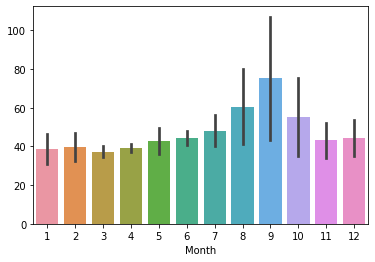

In [24]:
sns.barplot(data=aqi_per_month_df1)

In [25]:
epa_data['annual_county_aqi'].head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2020,269,250,19,0,0,0,0,74,49,36,0,0,198,0,71,0
1,Alabama,Clay,2020,108,99,9,0,0,0,0,86,49,26,0,0,0,0,108,0
2,Alabama,DeKalb,2020,364,350,14,0,0,0,0,90,45,36,0,0,331,0,33,0
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0,0
4,Alabama,Etowah,2020,278,260,18,0,0,0,0,92,46,34,0,0,204,0,74,0


In [26]:
#looks like data is only from 2020

If I were to use a parametric function to model the AQI over a year using the pattern shown for 2020, I would use a gaussian function maybe. If I were to assume that we see a linear increase in the average AQI per year I would add a linear term such that $$f(x) = a e^{-\frac{x^2}{2c^2}} + d*x$$ where x is the independent variable of time.

In [27]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def sample_data():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for Hurricane Katrina (2005).

    The data was originally sourced from the HURDAT2 dataset from AOML/NOAA:
    https://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.

    """
    lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
            -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
            -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
            -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
            -85.3, -82.9]

    lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
            25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
            25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
            35.6, 37.0, 38.6, 40.1]

    return lons, lats


def main():
    fig = plt.figure()
    # to get the effect of having just the states without a map "background"
    # turn off the background patch and axes frame
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),
                      frameon=False)
    ax.patch.set_visible(False)

    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    lons, lats = sample_data()

    ax.set_title('US States which intersect the track of '
                 'Hurricane Katrina (2005)')

    # turn the lons and lats into a shapely LineString
    track = sgeom.LineString(zip(lons, lats))

    # buffer the linestring by two degrees (note: this is a non-physical
    # distance)
    track_buffer = track.buffer(2)

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.859375)
        if geometry.intersects(track):
            facecolor = 'red'
        elif geometry.intersects(track_buffer):
            facecolor = '#FF7E00'
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

    ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                      facecolor='#C8A2C8', alpha=0.5)
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k')

    # make two proxy artists to add to a legend
    direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    labels = ['State directly intersects\nwith track',
              'State is within \n2 degrees of track']
    ax.legend([direct_hit, within_2_deg], labels,
              loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()

ModuleNotFoundError: No module named 'cartopy'

come back to this later

In [28]:
def bucket_data(table, aggfunc, resolution):
    long_buckets = np.sort(np.linspace(table['Longitude'].min(), table['Longitude'].max(), num = resolution, endpoint = False))
    lat_buckets = np.sort(np.linspace(table['Latitude'].min(), table['Latitude'].max(), num=resolution, endpoint=False))
    
    long_buckets_map = dict(list(zip(long_buckets, np.around(long_buckets,decimals=2))))
    lat_buckets_map = dict(list(zip(lat_buckets, np.around(lat_buckets,decimals=2))))
    
    get_lat_bucket_num = lambda loc: lat_buckets_map.get(lat_buckets[lat_buckets <= loc].max())
    get_long_bucket_num = lambda loc: long_buckets_map.get(long_buckets[long_buckets <= loc].max())
    
    table['lat_bucket'] = table['Latitude'].apply(get_lat_bucket_num)
    table['long_bucket'] = table['Longitude'].apply(get_long_bucket_num)
    
    pivot_cols = ['lat_bucket','long_bucket','AQI']
    
    return pd.pivot_table(table[pivot_cols], index = 'lat_bucket', columns = 'long_bucket', aggfunc = aggfunc)
    
bucket_data(epa_data_CA_merged, np.mean, 5)

AQI                                            
long_bucket    -124.20    -122.28    -120.36    -118.44    -116.52
lat_bucket                                                        
32.58              NaN        NaN  65.317391  87.059645  67.955508
34.41              NaN  50.221983  67.597970  74.442308  58.294118
36.25        42.792276  51.489882  81.094254  74.704918        NaN
38.08        38.934803  53.699484  48.977778        NaN        NaN
39.92        38.790792  55.207065        NaN        NaN        NaN

In [29]:
bd = bucket_data(epa_data_CA_merged, np.mean, 5)
bd.iloc[0,0]

nan

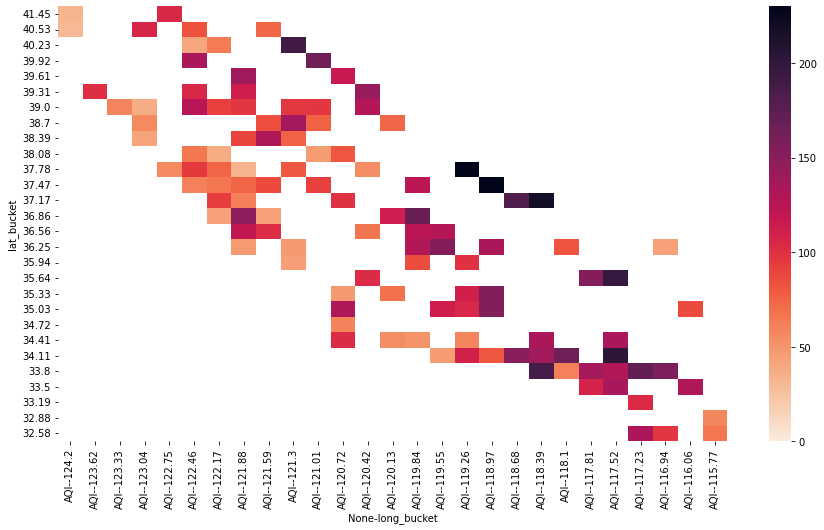

In [30]:
heatmap_data = bucket_data(epa_data_CA_merged[epa_data_CA_merged['Month']==9], np.median, 30)

#create visualization
plt.figure(figsize=(15, 8))
ax = sns.heatmap(heatmap_data, vmin=0, vmax=230, cmap = sns.cm.rocket_r)
ax.invert_yaxis()
plt.show()

The heatmap roughly looks like the outline of California, and the dark areas represent eastern California historically affected by wildfires, typically mountainous regions with lots of vegetation.

0.8730477899307385
0.6073127281702171
0.46838911539136174
0.7715462609616611
0.5789854885348934
0.4485534797991734
-0.8676596061217506
0.8512839095028797


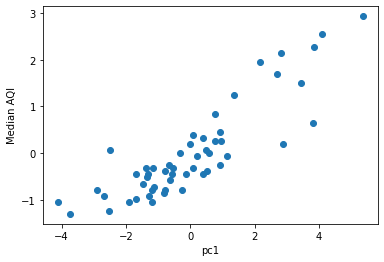

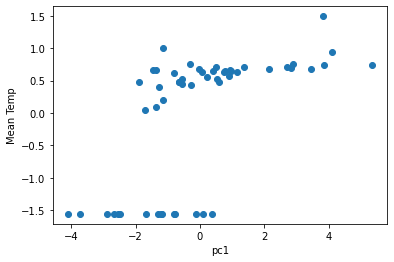

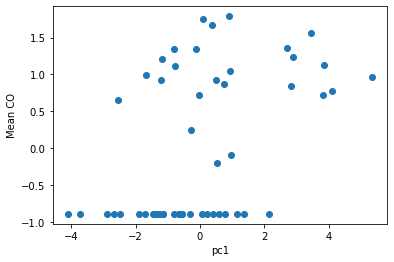

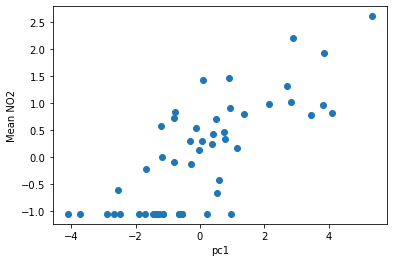

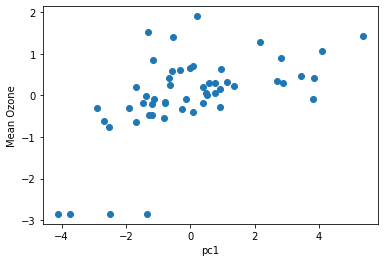

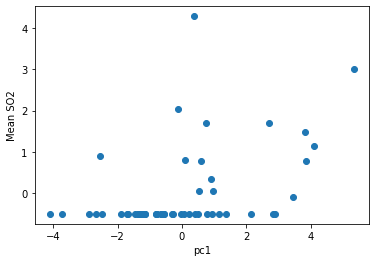

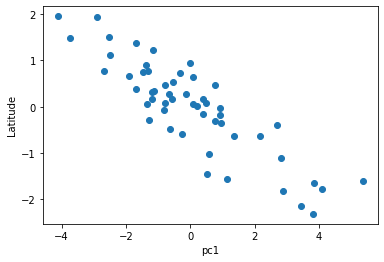

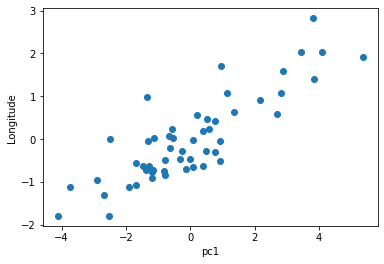

In [42]:
#data setup
import plotly.express as px
ca_aqi_agg = epa_data.get('annual_county_aqi')[epa_data.get('annual_county_aqi')['State'] == 'California']
ca_temp_agg = epa_data_CA['daily_wind'].groupby('County Name').mean('Arithmetic Mean')['Arithmetic Mean'].rename('Mean Temp')
ca_co_agg = epa_data_CA['daily_co'].groupby('County Name').mean('Arithmetic Mean')['Arithmetic Mean'].rename('Mean CO')
ca_no2_agg = epa_data_CA['daily_no2'].groupby('County Name').mean('Arithmetic Mean')['Arithmetic Mean'].rename('Mean NO2')
ca_ozone_agg = epa_data_CA['daily_ozone'].groupby('County Name').mean('Arithmetic Mean')['Arithmetic Mean'].rename('Mean Ozone')
ca_so2_agg = epa_data_CA['daily_so2'].groupby('County Name').mean('Arithmetic Mean')['Arithmetic Mean'].rename('Mean SO2')
ca_coords = epa_data_CA_merged.groupby('county Name').mean(['Latitude','Longitude'])[['Latitude','Longitude']]

ca_merged = ca_aqi_agg.merge(ca_temp_agg, left_on='County', right_on='County Name',how='left').fillna(0)
ca_merged = ca_merged.merge(ca_co_agg, left_on='County', right_on='County Name',how='left').fillna(0)
ca_merged = ca_merged.merge(ca_no2_agg, left_on='County', right_on='County Name',how='left').fillna(0)
ca_merged = ca_merged.merge(ca_ozone_agg, left_on='County', right_on='County Name',how='left').fillna(0)
ca_merged = ca_merged.merge(ca_so2_agg, left_on='County', right_on='County Name',how='left').fillna(0)
ca_merged = ca_merged.merge(ca_coords, left_on='County',right_on = 'county Name',how='left').fillna(0)

cols = ['Median AQI','Mean Temp','Mean CO', 'Mean NO2', 'Mean Ozone', 'Mean SO2', 'Latitude', 'Longitude']

ca_final = ca_merged.set_index('County')[cols]

ca_final_centered = (ca_final - np.mean(ca_final, axis=0))/np.std(ca_final, axis=0)
u, s, vt = np.linalg.svd(ca_final_centered, full_matrices = False)
first_2_pcs = pd.DataFrame(u[:,0:2]*s[0:2], columns = ['pc1','pc2'])

point_names = list(ca_final_centered.index) 
first_2_pcs['point'] = point_names

for col in cols:
    plt.figure()
    plt.scatter(first_2_pcs['pc1'],ca_final_centered[col])
    plt.ylabel(col)
    plt.xlabel('pc1')
    print(np.corrcoef(first_2_pcs['pc1'],ca_final_centered[col])[0,1])

fig = px.scatter(first_2_pcs, x="pc1", y="pc2", text="point"); 

fig.update_traces(textposition='top center');

fig.show(); 

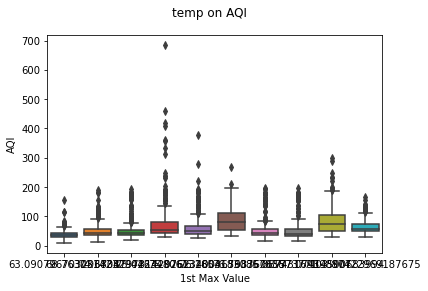

In [32]:
######Code for EDA Temp boxplot#####################
###############################################
###Trying out with addtion of temp
#data setup with Long and Lat
ca_annual = epa_data.get('annual_county_aqi')[epa_data.get('annual_county_aqi')['State'] == 'California']
ca_daily = epa_data_CA_merged
ca_merged_coords = ca_daily.merge(right=ca_annual, how='left', left_on='county Name', right_on='County')
cols = ['AQI','Longitude','Latitude','Good Days','Moderate Days','Unhealthy for Sensitive Groups Days','Unhealthy Days','Very Unhealthy Days','Hazardous Days','Max AQI','90th Percentile AQI','Median AQI','Days CO','Days NO2','Days Ozone','Days SO2','Days PM2.5','Days PM10']
ca_grouped_coords2 = ca_merged_coords.groupby(['county Name','Month']).mean(cols)[cols]
#restrict to CA
temp_df = epa_data.get('daily_wind')
temp_df = temp_df[temp_df['State Name'] == 'California']
temp_df = temp_df[['Observation Count', 'Units of Measure', 'Date Local','1st Max Value','County Name','1st Max Hour','Sample Duration',\
         'Datum']].groupby('County Name').agg({'Observation Count':'mean','Units of Measure':'first','1st Max Value':'mean','Sample Duration':'first','Datum':'first'})
ca_merged_coords_temp = ca_merged_coords.merge(right=temp_df,how='left', left_on='county Name', right_on='County Name')
ca_merged_coords_temp
data = ca_merged_coords_temp.head(5000)
ax = sns.boxplot(x="1st Max Value", y="AQI", data=data)
plt.suptitle("temp on AQI");

In [33]:
def bucket_temp(table, aggfunc, resolution):
    temp_buckets = np.sort(np.linspace(table['1st Max Value'].min(), table['1st Max Value'].max(), num=resolution, endpoint=False))
    
    temp_buckets_map = dict(list(zip(temp_buckets, np.around(temp_buckets,decimals=0))))
    
    get_temp_bucket_num = lambda loc: temp_buckets_map.get(temp_buckets[temp_buckets <= loc].max())
    
    table['temp_bucket'] = table['1st Max Value'].apply(get_temp_bucket_num)
    pivot_cols = ['temp_bucket', 'AQI']
    return table[pivot_cols]

ca_merged_coords_temp.dropna(axis=0,inplace=True)
dftemp =bucket_temp(ca_merged_coords_temp, np.mean, 20)

0.8512839095028799


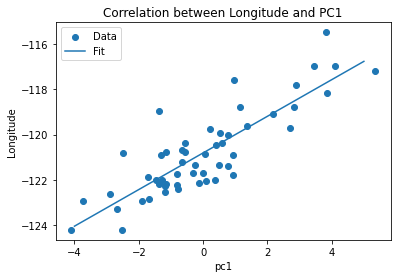

In [34]:

plt.scatter(first_2_pcs['pc1'], ca_final['Longitude'],label='Data')
plt.ylabel('Longitude')
plt.xlabel('pc1')
plt.title('Correlation between Longitude and PC1')
print(np.corrcoef((first_2_pcs['pc1'], ca_final['Longitude']))[0,1])
m,b= np.polyfit(first_2_pcs['pc1'], ca_final['Longitude'], 1)
x_val = np.linspace(-4,5,100)
plt.plot(x_val, m*x_val +b, label='Fit')
plt.legend()
plt.show()

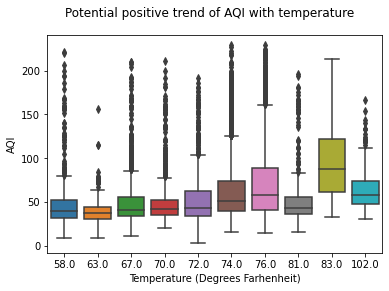

In [35]:
dftemp2=dftemp[dftemp['AQI'] < 230]#remove outliers
data = dftemp2
ax = sns.boxplot(x="temp_bucket", y="AQI", data=data)
plt.xlabel('Temperature (Degrees Farhenheit)')
plt.suptitle("Potential positive trend of AQI with temperature");
plt.savefig('./Aqi_temp')

Preliminary visual analysis of the scatter plot shows promise that there is a physical interpretation for each principal component. California counties shown on the right - San Bernardino, Los Angeles, Riverside - experienced much worse air quality with median AQI ranging from 80 to 95. On the left side of the plot, counties such as Del Norte and Trinity had very good air quality overall, with median . On the right compared to counties on the left such as Del Norte and Trinity, which had median AQI ranging from 28 to 32. Plotting standardized longitude against the first principal component, we see that there is a very strong correlation between the two (r = 0.85), indicating that longitude is a strong predictor of AQI. Indeed, a heat map showing the spatial evolution of AQI across California (notice that the heat map mostly takes on the shape of California) supports the fact that more eastern regions, which correspond to higher values of longitude, experience higher AQI than those closer to the western coast. Similar analysis shows that CO concentration is strongly correlated with the second principal component (r = 79). Boxplots of the temperature with respect to AQI measurements show a slight increasing trend that could be investigated further with quantitative analysis. In summary, we use PCA to reduce the dimensionality of our data. We found that the frist two principle components accounted for 72% of the variance of our data. Plotting each principle component, against the features of our data, we see a strong correlation between Longitude and PC1. It seems like the second principle component can be explained by the mean CO concentration. We additionally, visually inspected the correlation between temperature and AQI through the use of boxplots.

-0.11016237859887486
-0.644687215825128
0.7866939159362069
0.4471266952843491
-0.34972160786145845
0.5951927159740515
0.05365319325467462
-0.2862656523152409


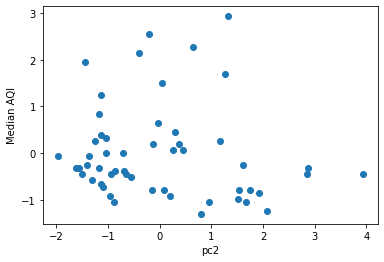

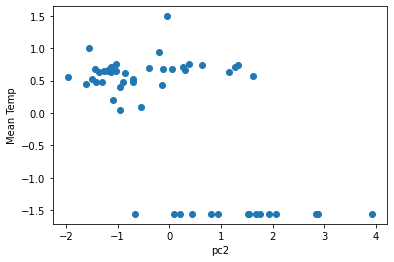

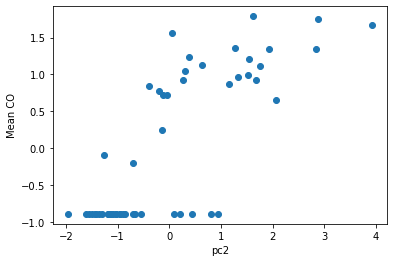

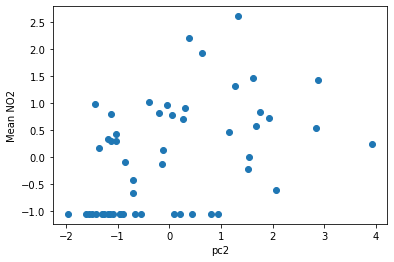

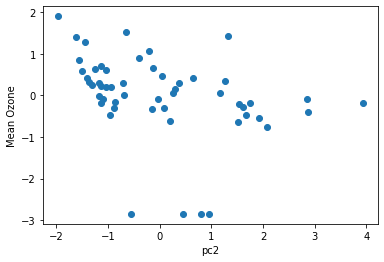

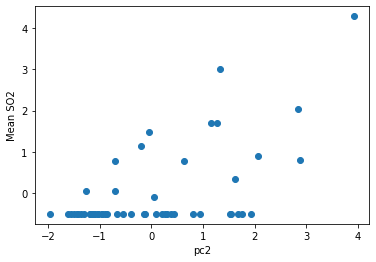

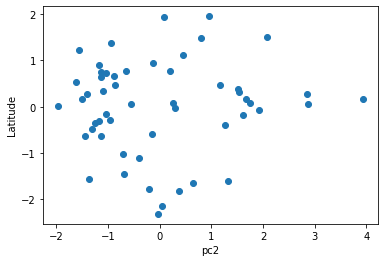

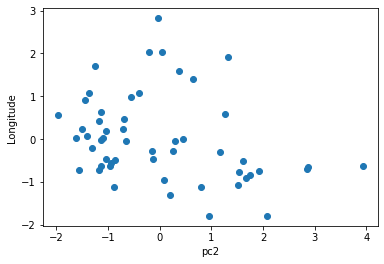

In [44]:
for col in cols:
    plt.figure()
    plt.scatter(first_2_pcs['pc2'],ca_final_centered[col])
    plt.ylabel(col)
    plt.xlabel('pc2')
    print(np.corrcoef(first_2_pcs['pc2'],ca_final_centered[col])[0,1])

In [41]:
ca_final_centered

,Median AQI,Mean Temp,Mean CO,Mean NO2,Mean Ozone,Mean SO2,Latitude,Longitude
County,,,,,,,,
Alameda,-0.327264,-1.559516,1.747788,1.421118,-0.403175,0.807502,0.064980,-0.658261
Amador,-0.718504,0.203448,-0.889566,-1.045110,-0.079049,-0.499057,0.342720,0.023054
Butte,0.194390,0.677792,0.722346,0.141608,0.661648,-0.499057,0.951278,-0.460345
Calaveras,-0.262057,0.477856,-0.889566,-1.045110,0.426845,-0.499057,0.276308,0.067711
Colusa,-0.653297,0.663500,-0.889566,-1.045110,-0.181087,-0.499057,0.736315,-0.643143
Contra Costa,-0.457677,-1.559516,1.666457,0.245446,-0.170716,4.279938,0.159314,-0.643286
Del Norte,-1.044537,-1.559516,-0.889566,-1.045110,-2.852319,-0.499057,1.947934,-1.798344
El Dorado,-0.327264,0.442253,-0.889566,-1.045110,1.402400,-0.499057,0.538834,0.027273
Fresno,1.694143,0.704528,1.355590,1.316396,0.348992,1.691255,-0.397300,0.589011


## Guided Modeling

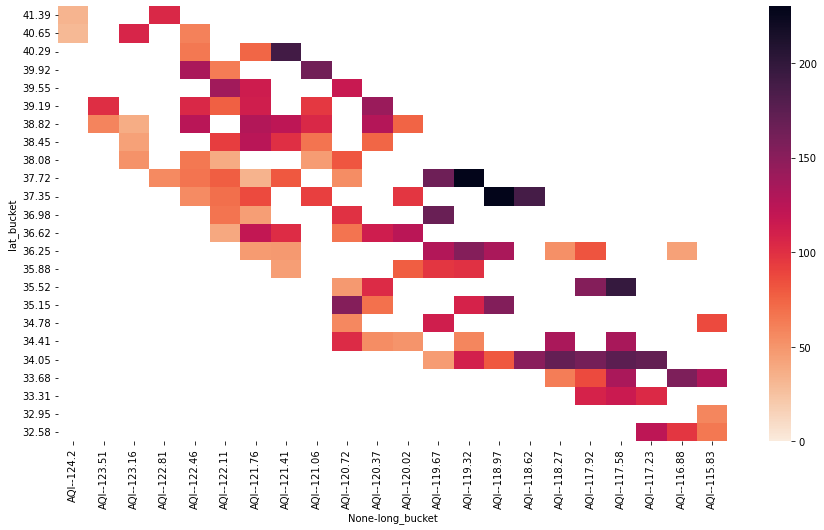

In [36]:
table_sep = epa_data_CA_merged[epa_data_CA_merged['Month'] == 9]
heatmap_data = bucket_data(table_sep, np.median, 25)

plt.figure(figsize=(15, 8))
ax = sns.heatmap(heatmap_data, vmin=0, vmax=230, cmap = sns.cm.rocket_r)
ax.invert_yaxis()
plt.show()

In [37]:
epa_data_CA_merged

,State Name,county Name,Month,Day,AQI,Category,Defining Site,Latitude,Longitude,lat_bucket,long_bucket
0,California,Alameda,1,1,53,Moderate,06-001-0009,37.743065,-122.169935,36.25,-122.28
1,California,Alameda,1,2,43,Good,06-001-0013,37.864767,-122.302741,36.25,-124.20
2,California,Alameda,1,3,74,Moderate,06-001-0013,37.864767,-122.302741,36.25,-124.20
3,California,Alameda,1,4,45,Good,06-001-0007,37.687526,-121.784217,36.25,-122.28
4,California,Alameda,1,5,33,Good,06-001-0007,37.687526,-121.784217,36.25,-122.28
...,...,...,...,...,...,...,...,...,...,...,...
19220,California,Yolo,12,27,20,Good,06-113-0004,38.534450,-121.773400,38.08,-122.28
19221,California,Yolo,12,28,33,Good,06-113-0004,38.534450,-121.773400,38.08,-122.28
19222,California,Yolo,12,29,28,Good,06-113-0004,38.534450,-121.773400,38.08,-122.28
19223,California,Yolo,12,30,39,Good,06-113-0004,38.534450,-121.773400,38.08,-122.28


In [54]:
annual_aqi = epa_data['annual_county_aqi']
annual_aqi.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2020,269,250,19,0,0,0,0,74,49,36,0,0,198,0,71,0
1,Alabama,Clay,2020,108,99,9,0,0,0,0,86,49,26,0,0,0,0,108,0
2,Alabama,DeKalb,2020,364,350,14,0,0,0,0,90,45,36,0,0,331,0,33,0
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0,0
4,Alabama,Etowah,2020,278,260,18,0,0,0,0,92,46,34,0,0,204,0,74,0


In [55]:
epa_data_CA_merged.head

,State Name,county Name,Month,Day,AQI,Category,Defining Site,Latitude,Longitude,lat_bucket,long_bucket
0,California,Alameda,1,1,53,Moderate,06-001-0009,37.743065,-122.169935,36.25,-122.28
1,California,Alameda,1,2,43,Good,06-001-0013,37.864767,-122.302741,36.25,-124.20
2,California,Alameda,1,3,74,Moderate,06-001-0013,37.864767,-122.302741,36.25,-124.20
3,California,Alameda,1,4,45,Good,06-001-0007,37.687526,-121.784217,36.25,-122.28
4,California,Alameda,1,5,33,Good,06-001-0007,37.687526,-121.784217,36.25,-122.28
...,...,...,...,...,...,...,...,...,...,...,...
19220,California,Yolo,12,27,20,Good,06-113-0004,38.534450,-121.773400,38.08,-122.28
19221,California,Yolo,12,28,33,Good,06-113-0004,38.534450,-121.773400,38.08,-122.28
19222,California,Yolo,12,29,28,Good,06-113-0004,38.534450,-121.773400,38.08,-122.28
19223,California,Yolo,12,30,39,Good,06-113-0004,38.534450,-121.773400,38.08,-122.28


In [57]:
CA_whole = epa_data_CA_merged.merge(annual_aqi, left_on="county Name", right_on="County")

In [58]:
CA_whole

,State Name,county Name,Month,Day,AQI,Category,Defining Site,Latitude,Longitude,lat_bucket,...,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,California,Alameda,1,1,53,Moderate,06-001-0009,37.743065,-122.169935,36.25,...,0,218,79,43,0,13,155,0,198,0
1,California,Alameda,1,2,43,Good,06-001-0013,37.864767,-122.302741,36.25,...,0,218,79,43,0,13,155,0,198,0
2,California,Alameda,1,3,74,Moderate,06-001-0013,37.864767,-122.302741,36.25,...,0,218,79,43,0,13,155,0,198,0
3,California,Alameda,1,4,45,Good,06-001-0007,37.687526,-121.784217,36.25,...,0,218,79,43,0,13,155,0,198,0
4,California,Alameda,1,5,33,Good,06-001-0007,37.687526,-121.784217,36.25,...,0,218,79,43,0,13,155,0,198,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23873,California,Yolo,12,27,20,Good,06-113-0004,38.534450,-121.773400,38.08,...,0,192,84,42,0,1,208,0,157,0
23874,California,Yolo,12,28,33,Good,06-113-0004,38.534450,-121.773400,38.08,...,0,192,84,42,0,1,208,0,157,0
23875,California,Yolo,12,29,28,Good,06-113-0004,38.534450,-121.773400,38.08,...,0,192,84,42,0,1,208,0,157,0
23876,California,Yolo,12,30,39,Good,06-113-0004,38.534450,-121.773400,38.08,...,0,192,84,42,0,1,208,0,157,0


## Daily data EDA

In [389]:
epa_data_CA_merged['year'] = '2020'

In [390]:
epa_data_CA_merged['Date Local'] = pd.to_datetime(epa_data_CA_merged[["year", 'Month', 'Day']])
epa_data_CA_merged['Date Local'] = epa_data_CA_merged['Date Local'].astype(str)
#epa_data_CA_merged['merge']=[i[0] + "_"+ i[1] for i in epa_data_CA_merged.index]

In [391]:
epa_data_CA_merged

,State Name,County Name,Month,Day,AQI,Category,Defining Site,Latitude,Longitude,year,Date Local
0,California,Alameda,1,1,53,Moderate,06-001-0009,37.743065,-122.169935,2020,2020-01-01
1,California,Alameda,1,2,43,Good,06-001-0013,37.864767,-122.302741,2020,2020-01-02
2,California,Alameda,1,3,74,Moderate,06-001-0013,37.864767,-122.302741,2020,2020-01-03
3,California,Alameda,1,4,45,Good,06-001-0007,37.687526,-121.784217,2020,2020-01-04
4,California,Alameda,1,5,33,Good,06-001-0007,37.687526,-121.784217,2020,2020-01-05
...,...,...,...,...,...,...,...,...,...,...,...
19220,California,Yolo,12,27,20,Good,06-113-0004,38.534450,-121.773400,2020,2020-12-27
19221,California,Yolo,12,28,33,Good,06-113-0004,38.534450,-121.773400,2020,2020-12-28
19222,California,Yolo,12,29,28,Good,06-113-0004,38.534450,-121.773400,2020,2020-12-29
19223,California,Yolo,12,30,39,Good,06-113-0004,38.534450,-121.773400,2020,2020-12-30


In [309]:
epa_data_CA_merged

,State Name,county Name,Month,Day,AQI,Category,Defining Site,Latitude,Longitude,Date
0,California,Alameda,1,1,53,Moderate,06-001-0009,37.743065,-122.169935,2020-01-01
1,California,Alameda,1,2,43,Good,06-001-0013,37.864767,-122.302741,2020-01-04
2,California,Alameda,1,3,74,Moderate,06-001-0013,37.864767,-122.302741,2020-01-07
3,California,Alameda,1,4,45,Good,06-001-0007,37.687526,-121.784217,2020-01-10
4,California,Alameda,1,5,33,Good,06-001-0007,37.687526,-121.784217,2020-01-13
...,...,...,...,...,...,...,...,...,...,...
19220,California,Yolo,12,27,20,Good,06-113-0004,38.534450,-121.773400,2020-07-15
19221,California,Yolo,12,28,33,Good,06-113-0004,38.534450,-121.773400,2020-07-16
19222,California,Yolo,12,29,28,Good,06-113-0004,38.534450,-121.773400,2020-07-17
19223,California,Yolo,12,30,39,Good,06-113-0004,38.534450,-121.773400,2020-07-18


In [392]:
epa_data_CA_merged = epa_data_CA_merged.set_index(['County Name', 'Date Local'], inplace=False)

In [395]:
preds = ['daily_so2', 'daily_no2', 'daily_co', 'daily_ozone', "daily_temp", "daily_wind"]
cols = ['County Name', 'Date Local', 'AQI', 'Arithmetic Mean', '1st Max Value']

In [406]:
def merge_data(preds, cols):
    #df = epa_data[preds[-1]].loc[epa_data[preds[-1]]['State Name'] == 'California']
    df = epa_data[preds[0]].loc[epa_data[preds[0]]['State Name'] == 'California'][cols].groupby(['County Name','Date Local']).agg(np.mean)[['AQI']]
    for pred in preds:
        df_ca = epa_data[pred].loc[epa_data[pred]['State Name'] == 'California'][cols].groupby(['County Name','Date Local']).agg(np.mean)
        df = df.join(df_ca, how='inner', rsuffix = pred[5:])
    df = df.drop(columns='AQI')
    return df

In [407]:
ca_whole = epa_data_CA_merged[['AQI','Category','Latitude','Longitude']].join(merge_data(preds, cols), how='inner')

In [408]:
ca_whole.columns

Index(['AQI', 'Category', 'Latitude', 'Longitude', 'AQI_so2',
       'Arithmetic Mean', '1st Max Value', 'AQI_no2', 'Arithmetic Mean_no2',
       '1st Max Value_no2', 'AQI_co', 'Arithmetic Mean_co', '1st Max Value_co',
       'AQI_ozone', 'Arithmetic Mean_ozone', '1st Max Value_ozone', 'AQI_temp',
       'Arithmetic Mean_temp', '1st Max Value_temp', 'AQI_wind',
       'Arithmetic Mean_wind', '1st Max Value_wind'],
      dtype='object')

In [409]:
ca_whole = ca_whole.rename(columns={'Arithmetic Mean': 'Arithmetic Mean_so2', '1st Max Value': '1st Max Value_so2'})

In [412]:
ca_whole = ca_whole.drop(columns=['AQI_wind', 'AQI_temp'])

In [414]:
ca_whole.to_csv('ca_whole.csv')